<a href="https://colab.research.google.com/github/cg-bond/PHSX-Lab-Bond/blob/main/first-color-cube-attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

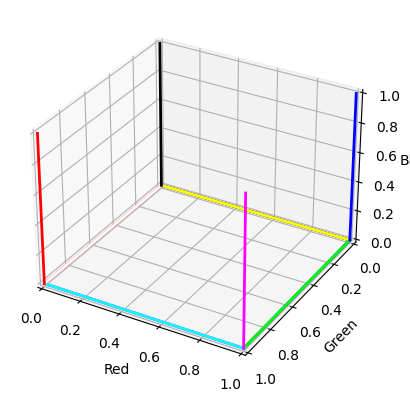

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

def interpolate_color(start_color, end_color, t):
    # Interpolate RGB values
    interpolated_color = [start + t * (end - start) for start, end in zip(start_color, end_color)]
    return interpolated_color

def draw_gradient_edges(ax):
    vertices = [
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
    ]

    # Colors at the corners of the cube
    colors_rgb = [
        [0, 0, 0],    # Black
        [0, 0, 1],    # Blue
        [1, 0, 1],    # Magenta
        [1, 0, 0],    # Red
        [1, 1, 0],    # Yellow
        [0, 1, 0],    # Green
        [0, 1, 1],    # Cyan
        [1, 1, 1]     # White
    ]

    # Draw gradients along the edges using a wireframe plot
    for i in range(4):
        start_color = colors_rgb[i]
        end_color = colors_rgb[(i + 1) % 4]
        line_colors = [interpolate_color(start_color, end_color, t) for t in np.linspace(0, 1, 100)]
        ax.plot3D(*zip(*[vertices[i], vertices[(i + 1) % 4]]), color=line_colors[0], linewidth=2)

    for i in range(4):
        start_color = colors_rgb[i + 4]
        end_color = colors_rgb[((i + 1) % 4) + 4]
        line_colors = [interpolate_color(start_color, end_color, t) for t in np.linspace(0, 1, 100)]
        ax.plot3D(*zip(*[vertices[i], vertices[(i + 1) % 4]]), color=line_colors[0], linewidth=2)

    for i in range(4):
        start_color = colors_rgb[i]
        end_color = colors_rgb[i + 4]
        line_colors = [interpolate_color(start_color, end_color, t) for t in np.linspace(0, 1, 100)]
        ax.plot3D(*zip(*[vertices[i], vertices[i + 4]]), color=line_colors[0], linewidth=2)

    # Set plot limits
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])

    # Invert the y-axis to place the origin at the bottom
    ax.invert_yaxis()

    # Set axis labels
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw gradients along the edges of the cube using a wireframe plot
draw_gradient_edges(ax)

# Show the plot
plt.show()
